# [Lab 2] Regularized regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

## 1. Download the data set for this lab from the course site available on campus.ece.fr, and divide the data in two parts: training data (70%) and test data.


In [2]:
data = np.loadtxt("data_lab2.txt")

In [3]:
split = 70
#np.random.shuffle(data)
train, test = data[:split],data[split:]

In [4]:
X_train = train[:,0]
y_train = train[:,1]
y_train = y_train.reshape(y_train.size,1)
X_test = test[:,0]
y_test = test[:,1]
y_test = y_test.reshape(y_test.size,1)

Text(0.5,1,'data_lab2')

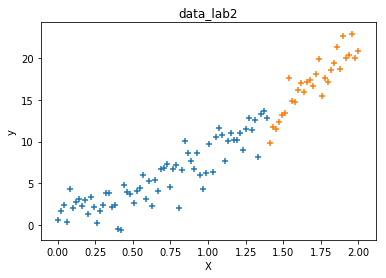

In [5]:
plt.scatter(X_train,y_train,marker="+")
plt.scatter(X_test,y_test,marker="+")
plt.xlabel("X")
plt.ylabel("y")

plt.title("data_lab2")

In [6]:
X0 = np.zeros(X_test.size)+1
X_test = np.stack((X0,X_test), axis=1)
X0 = np.zeros(X_train.size)+1
X_train = np.stack((X0,X_train), axis=1)

## 2. Find the optimal regression parameters for the following types of hypothesis functions (using the closed-form solution):



In [7]:
def closed_form(X, y):
    thetas = np.dot(np.dot(inv(np.dot(X.T,X)),X.T),(y))
    return thetas

### a) unregularized linear


In [8]:
thetas_line = closed_form(X_train, y_train)
print("Theta 1 =", thetas_line[1], " Theta 0 =", thetas_line[0])

Theta 1 = [8.26760735]  Theta 0 = [0.18763866]


### b) unregularized parabolic


In [9]:
X_1 =train[:,0].reshape(70,1)

In [10]:
X_2 = np.square(X_1)
X_train_2  = np.concatenate((X_train, X_2), axis=1)

In [11]:
thetas_para = closed_form(X_train_2, y_train)
print("Theta 2 =", thetas_para[2], "Theta 1 =", thetas_para[1], " Theta 0 =", thetas_para[0])

Theta 2 = [4.35480533] Theta 1 = [2.19727265]  Theta 0 = [1.5774796]


### c) unregularized 5th-order polynomial


In [12]:
X_3 = np.power(X_1,3)
X_train_3  = np.concatenate((X_train_2, X_3), axis=1)
X_4 = np.power(X_1,4)
X_train_3  = np.concatenate((X_train_3, X_4), axis=1)
X_5 = np.power(X_1,5)
X_train_3  = np.concatenate((X_train_3, X_5), axis=1)
X_train_3.shape

(70, 6)

In [13]:
thetas_5 = closed_form(X_train_3, y_train)
print("Theta 5 =", thetas_5[5],"Theta 4 =", thetas_5[4],"Theta 3 =", thetas_5[3], "Theta 2 =", thetas_5[2]," Theta 1 =", thetas_5[1], " Theta 0 =", thetas_5[0])

Theta 5 = [26.56182717] Theta 4 = [-91.43111654] Theta 3 = [107.37525222] Theta 2 = [-44.08589458]  Theta 1 = [8.42867414]  Theta 0 = [1.64250254]


### d) regularized 5th-order polynomial (RIDGE)



In [14]:
def closed_form_reg(X, y, n, l1):
    mat = np.eye(n+1, dtype=int)
    mat[0,0] = 0
    thetas = np.dot(np.dot(inv(np.dot(X.T,X)+l1*mat),X.T),(y))
    return thetas

In [15]:
thetas_5r = closed_form_reg(X_train_3, y_train,5,1.8)
print("Theta 5 =", thetas_5r[5],"Theta 4 =", thetas_5r[4],"Theta 3 =", thetas_5r[3], "Theta 2 =", thetas_5r[2]," Theta 1 =", thetas_5r[1], " Theta 0 =", thetas_5r[0])

Theta 5 = [-0.50961234] Theta 4 = [0.67822765] Theta 3 = [1.5810248] Theta 2 = [2.14796948]  Theta 1 = [2.08606264]  Theta 0 = [1.94533825]


## 3. Plot the training data as well as the fitted curves.


Text(0,0.5,'y')

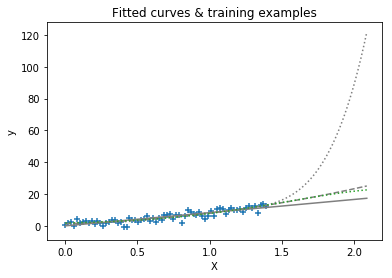

In [16]:
plt.title("Fitted curves & training examples")
x=np.arange(start=0,stop=2.1,step=0.01)
plt.plot(x,x*thetas_line[1]+thetas_line[0], c = "tab:grey")
plt.plot(x,(x**2)*thetas_para[2]+x*thetas_para[1]+thetas_para[0], c = "tab:grey", ls='--')
plt.plot(x,(x**5)*thetas_5[5]+(x**4)*thetas_5[4]+(x**3)*thetas_5[3]+(x**2)*thetas_5[2]+x*thetas_5[1]+thetas_5[0], c = "tab:grey", ls=':')
plt.plot(x,(x**5)*thetas_5r[5]+(x**4)*thetas_5r[4]+(x**3)*thetas_5r[3]+(x**2)*thetas_5r[2]+x*thetas_5r[1]+thetas_5r[0], c = "tab:green", ls=':')
plt.scatter(X_train[:,1],y_train,marker="+")
plt.xlabel("X")
plt.ylabel("y")

## 4. Compute and compare the residuals (i.e., errors) between the training output and the pre-dicted training output for all the considered hypothesis functions.


In [17]:
def hypothesis(X, thetas):
    return np.dot(X,thetas)

In [18]:
def mse(X,y,thetas):
    predictions = hypothesis(X,thetas)
    return (1/y.size)*np.sum(np.square(predictions-y))

In [19]:
MSE = []
MSE = np.append(MSE,mse(X_train, y_train,thetas_line))
MSE = np.append(MSE,mse(X_train_2, y_train,thetas_para))
MSE = np.append(MSE,mse(X_train_3, y_train,thetas_5))
MSE = np.append(MSE,mse(X_train_3, y_train,thetas_5r))
MSE

array([3.00563464, 2.58472096, 2.51202689, 2.63850026])

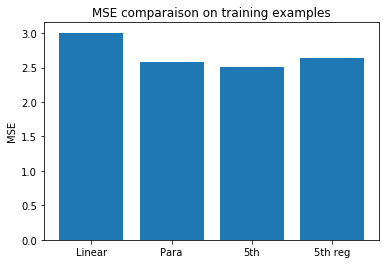

In [20]:
plt.title("MSE comparaison on training examples")
plt.ylabel("MSE")
x=np.arange(MSE.size)
plt.bar(x, MSE)
plt.xticks(x, ('Linear', 'Para', '5th','5th reg'))
plt.show()


## 5. Plot the test data as well as the fitted curves.


Text(0,0.5,'y')

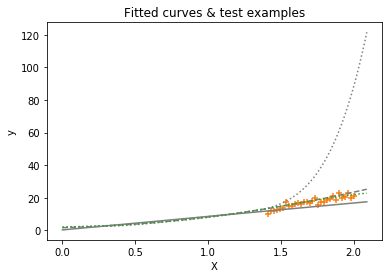

In [21]:
plt.title("Fitted curves & test examples")
x=np.arange(start=0,stop=2.1,step=0.01)
plt.plot(x,x*thetas_line[1]+thetas_line[0], c = "tab:grey")
plt.plot(x,(x**2)*thetas_para[2]+x*thetas_para[1]+thetas_para[0], c = "tab:grey", ls='--')
plt.plot(x,(x**5)*thetas_5[5]+(x**4)*thetas_5[4]+(x**3)*thetas_5[3]+(x**2)*thetas_5[2]+x*thetas_5[1]+thetas_5[0], c = "tab:grey", ls=':')
plt.plot(x,(x**5)*thetas_5r[5]+(x**4)*thetas_5r[4]+(x**3)*thetas_5r[3]+(x**2)*thetas_5r[2]+x*thetas_5r[1]+thetas_5r[0], c = "tab:green", ls=':')
plt.scatter(X_test[:,1],y_test,marker="+",c = "tab:orange")
plt.xlabel("X")
plt.ylabel("y")

## 6. Compute and compare the residuals (i.e., errors) between the test output and the predicted test output for all the considered hypothesis functions.

In [22]:
X_1 = test[:,0].reshape(30,1)
X_2 = np.square(X_1)
X_test_2  = np.concatenate((X_test, X_2), axis=1)

In [23]:
X_3 = np.power(X_1,3)
X_test_3  = np.concatenate((X_test_2, X_3), axis=1)
X_4 = np.power(X_1,4)
X_test_3  = np.concatenate((X_test_3, X_4), axis=1)
X_5 = np.power(X_1,5)
X_test_3  = np.concatenate((X_test_3, X_5), axis=1)
X_test_3.shape

(30, 6)

In [24]:
MSE_2 = []
MSE_2 = np.append(MSE_2,mse(X_test, y_test,thetas_line))
MSE_2 = np.append(MSE_2,mse(X_test_2, y_test,thetas_para))
MSE_2 = np.append(MSE_2,mse(X_test_3, y_test,thetas_5))
MSE_2 = np.append(MSE_2,mse(X_test_3, y_test,thetas_5r))
MSE_2

array([ 11.91316311,   3.15216811, 790.40910238,   2.64698448])

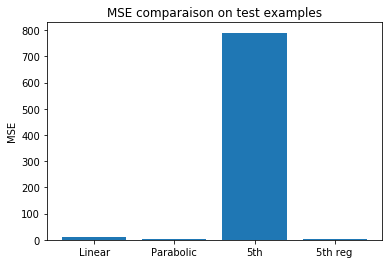

In [25]:
plt.title("MSE comparaison on test examples")
plt.ylabel("MSE")
x=np.arange(MSE_2.size)
plt.bar(x, MSE_2)
plt.xticks(x, ('Linear', 'Parabolic', '5th','5th reg'))
plt.show()